# CONTENTS
- The motivation
- The Intuition
- Mathematical concepts
- Implementation of the Methods (Analytical and Numerical)
- *This notebook Focuses only on the Analytical Approach*


# THE MOTIVATION
- The Linear Regression is the most natural learning algorithm for modelling data.

#### Assumptions of the Linear Regression Model

- It assumes a liner relationship between the dependent and independent variables
- It assumes the variables follow a normal distrubtion , and like most Machine learning models, it assumes the features are Identically Independently distributed(I.I.D)
- It assumes No or little multicollinearity
- It assumes no auto-correlation between features
- It assumes Homoscedasticity of features

# THE INTUITION
#####  Linear regression approach is divided into two categories:
- The Analytical approach*
- The Numerical Approach *

- The Analytical Approach also called the Closed form solution, uses the Normal equation(or Ordinary Least squared approach), with no update rule for the weights(theta). It models a linear relationship between the dependent and independent variables and calculates the error between expected and the actual using a set criterion(either of RMSE, MSE, MAE)

- The Numerical Approach uses Iterative methods updates weights until convergence or a global minimum is achieved, where the best or optimum weight value is achieved with cost error minimization. 

# Mathematical Concept: The Closed Form Solution

- **Consider the following dataset $\mathcal{D} = \{x_i,y_i \}^{N}_{i=1}$, with $x_i\in \mathbb{R}^{d}, y_i\in \mathbb{R}$**

- Context: Supervised Learning
- Fit a line of the form: $y = X\theta $, $y \in \mathbb{R}^{N}$.
- Concept: Error Minimization of the difference between Predicted ($\hat{y}$) and Actual(y) i.e Mimimizing the square deviation(Mean Squared Error/ Cost Function/Error Metrics/Criteria

- $x_i$ : are the features.
- $y_i$ : is the reponse variable. 

### Prove/Derivation

$y_i = \theta_0 +\theta_1X_1 + .......\theta_n + e_i$ : Where $e_i$ is the error parameter

- Assuming the slope of the function at the point where the error is lowest is Zero(0)i.e
$Gradient \nabla\theta = 0$

Then:
$\frac{\partial\theta}{\partial t} = 0$

- $min_\theta ||y-x\theta||^2$

- Given that in Matrix calculus ; $||a||^2 = a^Ta$ ; i.e the norm squared of a is the transpose of a multiplied by a.

Then:
- $min_\theta ||y-x\theta||^2$ ; becomes;

$(y-x\theta)^T(y-x\theta)$
Taking the Partial derivation with respect to $\theta$ ;
- Knowing that:
$\frac{\partial}{\partial \theta} = 0$ ; at optimal value of $\theta$
- and: 
$\frac{\partial A^TA}{\partial \theta} = 2A^T\frac{\partial A}{\partial \theta}$
- also: 
$\frac{\partial y}{\partial \theta} = 0$ ; because it does not exist

- The solution is thus:
$\frac{\partial}{\partial \theta} = 0 = 2(y-x\theta)^T.(\frac{\partial}{\partial \theta}(y-x\theta))$
- $0 = 2(y-x\theta)^T.(-x)$
- $0 = (y-x\theta)^T.(-x)$
- Reversing the transpose to get rid of the negative sign;
- $0 = x^T(y-x\theta)$
- Expanding the bracket;
- $0 = x^Ty - x^Tx\theta$
- $x^Tx\theta = x^Ty$
- $\theta = (x^Tx)^{-1}.x^Ty$ : is the closed form solution for finding $\theta$

### The Error / Criteria :
- This can be calculated using the Mean Squared Error, given by:
$MSE = \frac{1}{N}\sum_{i=1}^n(h_\theta(x) - y^i)^2$

Where:

$h_\theta(x) = \hat{y}$




#### Another way of calculating the error/criteria is using the maximum likelihood estimation.

- The Maximum Likelihood Estimation(MLE) is a way of estimating the best parameters of a model given the data by maximizing the probability of the data.

Given that $y_i = \theta^Tx^i + \epsilon_i$ ; where $\epsilon \sim N(0,\theta^2)$
- The features are assumed to be centered with $\mu (mean) = 0$
- $\epsilon$ = difference between the predicions and the target. $\epsilon$ is a random variable and assumes I.I.D.

- For the purpoe of this notebook, the focus is the MSE uisng OLS, however, the formula for MSE using MLE is given below:
- Maximizing the log likelihood of $P(y_i|x_i; \theta)$ is equal to minimizing the loss.


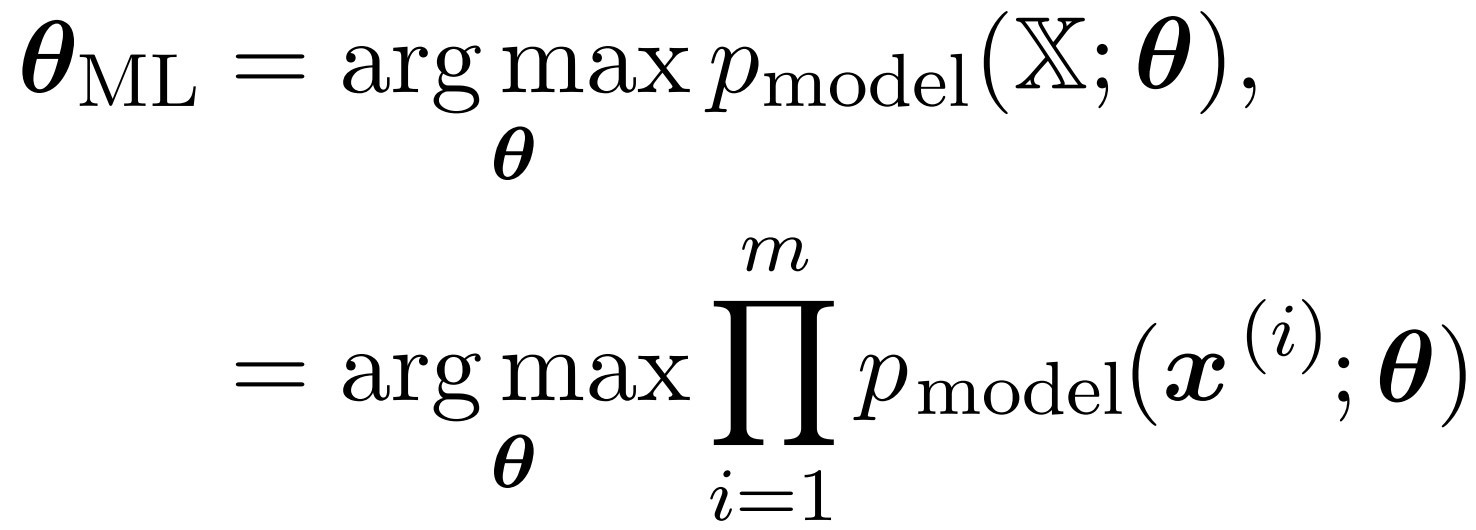

In [1]:
from IPython.display import Image
Image('1_WUSlJFRlqlZuclfEFmv76w.jpeg')

# Implementation of the Closed Form Solution- Analytical Approach

In [2]:
#Import the required Library
import pandas as pd # For reading the data and data preprocessing
import numpy as np #For linear Algebra
import seaborn as sns # for visualization
import matplotlib.pyplot as plt #For visualization
#Ipython Magic command for Inline plot display
%matplotlib inline 
import warnings #To hide unnecessary warnings
warnings.filterwarnings('ignore')


### Read the Data

In [3]:
#Define a function to read the Data
def read_data(path,header,sep): #Define function
    
    df = pd.read_csv(path,header,sep) #read the data
    
    print(df.shape) #Get the shape of the data
    print(df.columns)
    
    return df #return df from the function
df = read_data('o-ring-erosion-only.data', header=None, sep='\s+')  #applying the function

(22, 5)
Index(['6', '0', '66', '50', '1'], dtype='object')


In [4]:
col = ['Number of O-rings at risk on a given flight',
       'Number experiencing thermal distress',
       'Launch temperature (degrees F)',
       'Leak-check pressure (psi)',
       'Temporal order of flight']
df.columns = col
df.head()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [5]:
df.shape

(22, 5)

In [6]:
df.describe()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
count,22.0,22.000000,22.000000,22.000000,22.000000
mean,6.0,0.318182,69.727273,156.818182,12.500000
std,0.0,0.567900,7.179215,66.000459,6.493587
min,6.0,0.000000,53.000000,50.000000,2.000000
25%,6.0,0.000000,67.000000,100.000000,7.250000
50%,6.0,0.000000,70.000000,200.000000,12.500000
75%,6.0,0.750000,75.000000,200.000000,17.750000
max,6.0,2.000000,81.000000,200.000000,23.000000


In [7]:
df['Number of O-rings at risk on a given flight'].unique()

array([6])

### Split the data into X and Y

In [8]:
#Split the data into X and Y
def splitxy(df):
    """ Defining a split function to get X(features) and Y(target) variables"""
    
    X = df.drop(['Number of O-rings at risk on a given flight','Number experiencing thermal distress'], axis = 1)
    Y = df['Number experiencing thermal distress']
    
    return X,Y 

In [9]:
X,Y = splitxy(df)
X

,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,70,50,2
1,69,50,3
2,68,50,4
3,67,50,5
4,72,50,6
5,73,100,7
6,70,100,8
7,57,200,9
8,63,200,10
9,70,200,11


### Standardize X and Add a Bias

In [10]:
def preprocess(X,Y):
    
    """ Defining the preprocess function. 
        Calling X and Y variable from the preprocess function defined earlier"""
    X, Y = splitxy(df) 
    #X = (X - X.min())/(X.max() - X.min()) #Min-Max/Standardization
    X =(X - X.mean())/X.std() #Normalization
    Y = Y.values.reshape(-1,1)
    return X,Y

def bias(X):
    b = np.ones((len(X),1)) 
    
    """Remember the double parenthesis when using np.ones
    Also remember that when '1' is added, 
    it states that the array wil be built column-wise
    So stacking with X has to be in the same representation"""
    
    X,_ = preprocess(X,Y)
    
    X = np.concatenate([X,b], axis=1) #Concatenate X and bias, column wise
    
    
    return X    

### Spiltting into Train and Test Set (Train_Test_Split from Scratch)

In [11]:
def train_test_split(X,Y,split_size=0.2): 
    
    """ Defining split function, presetting the split ratio to 20%,
        although it can be changed when calling the function by passing the desired value
        using the name of the argument"""
    _,Y = preprocess(X,Y) #Get Y, from the preprocess function
    X = bias(X) #Get X from the bias function
    
    
    #Shuffling Data
    np.random.shuffle(X) #using numpy here but pandas can be used on the dataframe(df) directly before splitting
    np.random.shuffle(Y)
    
    n = X.shape[0] #number of data points/rowa
    test_size = n - int(n * split_size) #multiply by split size
    """we have to cast an int here because by default Python returns a float value,
    Which is not what we seek"""
    X_train,X_test = X[:test_size], X[test_size:]
    Y_train,Y_test = Y[:test_size], Y[test_size:]
    
    
    print("X_train Shape is: ", X_train.shape)
    print("X_test Shape is: ", X_test.shape)
    print("Y_train Shape is: ", Y_train.shape)
    print("Y_test Shape is: ", Y_test.shape)
    
    
    return X_train,X_test,Y_train,Y_test
    


In [12]:
#Get train and test set and store in a variable
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

X_train Shape is:  (18, 4)
X_test Shape is:  (4, 4)
Y_train Shape is:  (18, 1)
Y_test Shape is:  (4, 1)


## MODELLING : Simple Linear Regression

In [13]:
#Define a Class
class LinearRegression:
    def __init__(self):
        self.Theta = None
    def fit(self,X_train,Y_train):
        """ Train/Fit Function
        Calculate theta using inv(X.T@X)@X.T@Y"""
        
        X_x = X_train.T@X_train #X-tern
        X_y = X_train.T@Y_train #Y-term
        
        self.theta =  (np.linalg.inv(X_x))@X_y
        
        return self.theta
    

        
    def predict(self,X_test):
        """ Predict Function on Test set"""
        self.y_pred = np.dot(X_test, self.theta)
        
        return self.y_pred
    
    def compute_mse(self):
        """ Error Function"""
        
        mse = (np.subtract(self.y_pred, Y_test)**2).mean()
        
        print('Mse is: ')
        
        return mse
        
        
        
        

In [14]:
model = LinearRegression()
model.fit(X_train,Y_train)


array([[ 0.10133592],
       [-0.07428578],
       [-0.07352601],
       [ 0.41887891]])

In [15]:
model.predict(X_test)

array([[0.323173  ],
       [0.64478502],
       [0.61097003],
       [0.63640808]])

In [16]:
model.compute_mse()

Mse is: 


0.32462203247982385